# This notebook calculates all the 28 vegetation indices of the PRISMA rasters and stacks them. Besides, this notebook also stack some selected vegetaion indices which will be used in biodivmapR. 

In [54]:
import os
import matplotlib.pyplot as plt
import numpy as np
# 16 Oct 2023: gdal must be imported first, and then rasterio can be imported
from osgeo import gdal
import rasterio as rio

In [55]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Sentinel = cwd + "\\ProcessedData"
cwd_Sentinel_Results = cwd + "\\Results"

In [56]:
# Get the name of all the rasters in our folder
raster_Names = [name.split('.')[0] for name in os.listdir(cwd_Sentinel)]
raster_Names = list(set(raster_Names))
raster_Names

['2022 06', '2022 09']

In [57]:
raster_Paths = []
for name in raster_Names:
    temp = cwd_Sentinel + "\\" + name + "\\" + name + "Cropped"
    raster_Paths.append(temp)
raster_Paths

['c:\\Users\\m1865\\Desktop\\Ticino\\ProcessedData\\2022 06\\2022 06Cropped',
 'c:\\Users\\m1865\\Desktop\\Ticino\\ProcessedData\\2022 09\\2022 09Cropped']

In [58]:
raster_Raw = []
for raster in raster_Paths:
    temp = rio.open(raster)
    raster_Raw.append(temp)
raster_Raw

[<open DatasetReader name='c:/Users/m1865/Desktop/Ticino/ProcessedData/2022 06/2022 06Cropped' mode='r'>,
 <open DatasetReader name='c:/Users/m1865/Desktop/Ticino/ProcessedData/2022 09/2022 09Cropped' mode='r'>]

In [59]:
# Set here the raster to be used to calculate these indices
raster_Sel = raster_Raw[1]
raster_Names_Sel = raster_Names[1]

## Sentinel-2 Bands: 
{B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12}

In [60]:
B02 = raster_Sel.read(1)
B02 = np.ma.masked_array(B02, mask = (B02 == 0))
B03 = raster_Sel.read(2)
B03 = np.ma.masked_array(B03, mask = (B03 == 0))
B04 = raster_Sel.read(3)
B04 = np.ma.masked_array(B04, mask = (B04 == 0))
B05 = raster_Sel.read(4)
B05 = np.ma.masked_array(B05, mask = (B05 == 0))
B06 = raster_Sel.read(5)
B06 = np.ma.masked_array(B06, mask = (B06 == 0))
B07 = raster_Sel.read(6)
B07 = np.ma.masked_array(B07, mask = (B07 == 0))
B08 = raster_Sel.read(7)
B08 = np.ma.masked_array(B08, mask = (B08 == 0))
B8A = raster_Sel.read(8)
B8A = np.ma.masked_array(B8A, mask = (B8A == 0))
B11 = raster_Sel.read(9)
B11 = np.ma.masked_array(B11, mask = (B11 == 0))
B12 = raster_Sel.read(10)
B12 = np.ma.masked_array(B12, mask = (B12 == 0))

## Anthocyanin Reflectance Index (ARI)
(1 / B03) - (1 / B05)

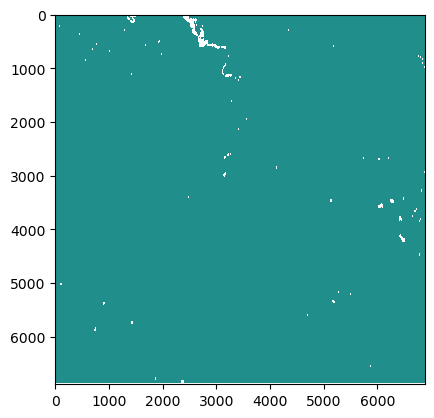

In [61]:
band_ARI = 1/B03 - 1 / B05
plt.imshow(band_ARI)
plt.show()

## Atmospheric Resistant Vegetation Index (ARVI)
(B8A - B04 - 0.106  * (B04 - B02)) / (B8A + B04 - 0.106  * (B04 - B02))

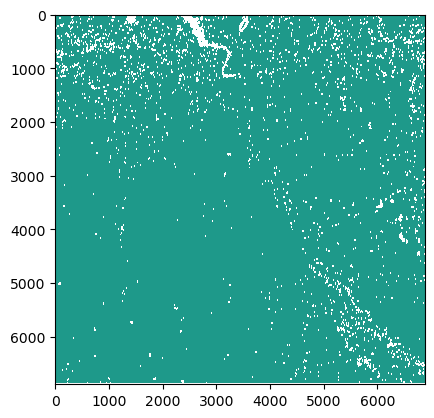

In [62]:
band_ARVI = (B8A - B04 - 0.106  * (B04 - B02)) / (B8A + B04 - 0.106  * (B04 - B02))
# Plot to check if any obvious anomaly
plt.imshow(band_ARVI)
plt.show()

## Enhanced Vegetation Index (EVI)
2.5 * ((B08 - B04) / (B08 + 6 * B06 - 7.5 * B02 ) + 1)

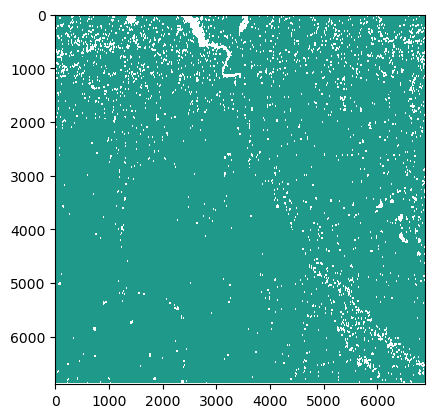

In [63]:
band_EVI = 2.5 * ((B08 - B04) / (B08 + 6 * B06 - 7.5 * B02 ) + 1)
# Plot to check if any obvious anomaly
plt.imshow(band_EVI)
plt.show()

## Modified Chlorophyll Absorption Ratio Index (MCARI)
((B05 - B04) - 0.2 * (B05 - B03)) * (B05 / B04)

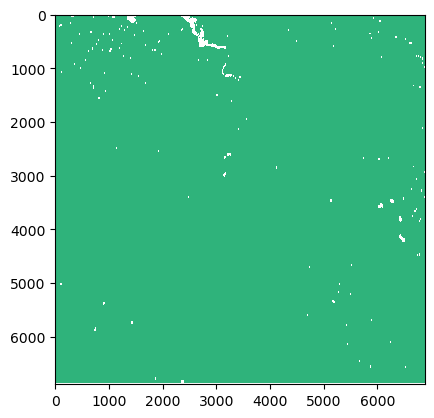

In [64]:
band_MCARI = ((B05 - B04) - 0.2 * (B05 - B03)) * (B05 / B04)
# Plot to check if any obvious anomaly
plt.imshow(band_MCARI)
plt.show()

## Moisture Stress Index (MSI)
B11 / B08

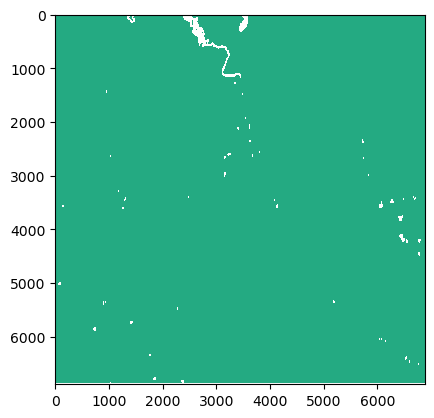

In [65]:
band_MSI = B11 / B08
# Plot to check if any obvious anomaly
plt.imshow(band_MSI)
plt.show()

## Normalized Difference Infrared Index (NDII)
(B08 - B11) / (B08 + B11)

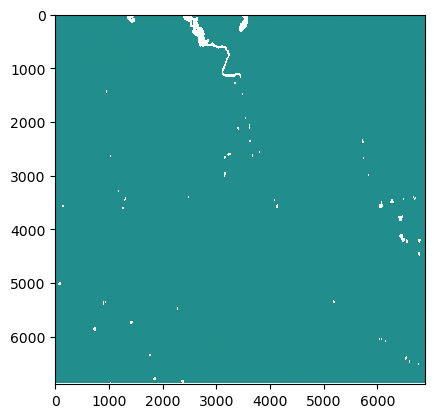

In [66]:
band_NDII = (B08 - B11) / (B08 + B11)
# Plot to check if any obvious anomaly
plt.imshow(band_NDII)
plt.show()

## Normalized Difference Vegetation Index (NDVI)
(B08 - B04) / (B08 + B04)

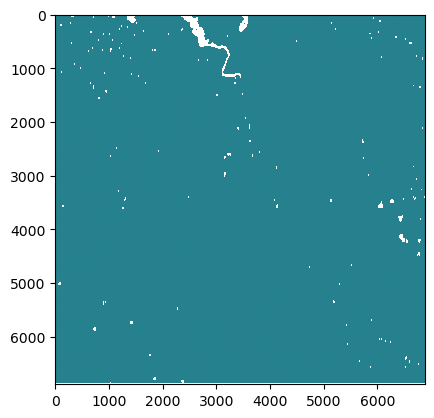

In [67]:
band_NDVI = (B08 - B04) / (B08 + B04)
# Plot to check if any obvious anomaly
plt.imshow(band_NDVI)
plt.show()

## Normalized Difference Water Index (NDWI)
(B03 - B08) / (B03 + B08)

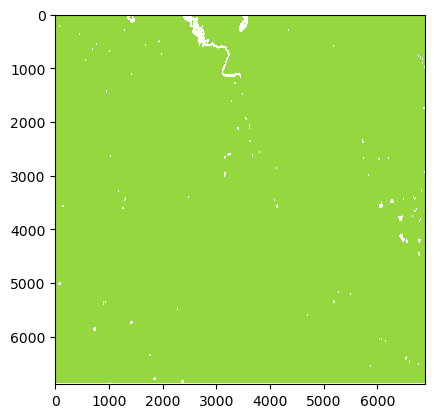

In [68]:
band_NDWI = (B03 - B08) / (B03 + B08)
# Plot to check if any obvious anomaly
plt.imshow(band_NDWI)
plt.show()

## Optimized Soil-Adjusted Vegetation Index (OSAVI)
(B08 - B04) / (B08 + B04 + 0.428) * (1.0 + 0.428)

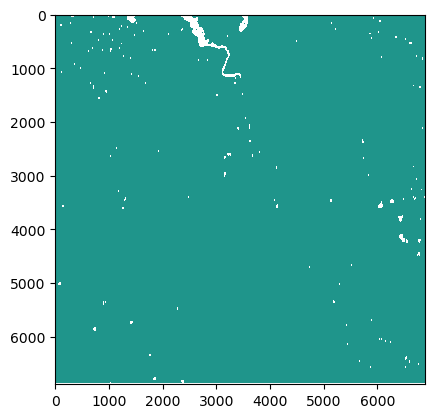

In [69]:
band_OSAVI = (B08 - B04) / (B08 + B04 + 0.428) * (1.0 + 0.428)
# Plot to check if any obvious anomaly
plt.imshow(band_OSAVI)
plt.show()

## Red Edge Normalized Difference Vegetation Index (RENDVI)
(p752 - p701) / (p752 + p701)  

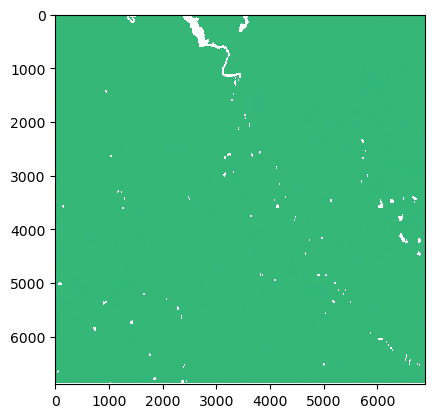

In [70]:
# Calculation based on the formula
band_RENDVI = (B06 - B05) / (B06 + B05)  
# Plot to check if any obvious anomaly
plt.imshow(band_RENDVI)
plt.show()

## Red Edge Position (REP)
700 + 40 * ((((B04 + B07) / 2) - B05) / (B06 - B05))

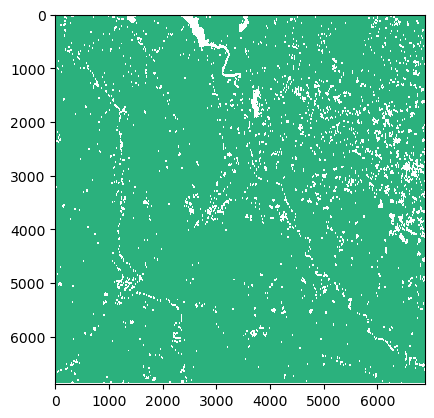

In [71]:
# Calculation based on the formula
band_REP = 700 + 40 * ((((B04 + B07) / 2) - B05) / (B06 - B05))
# Plot to check if any obvious anomaly
plt.imshow(band_REP)
plt.show()

## Red Green Ratio (RG)
B04 / B03

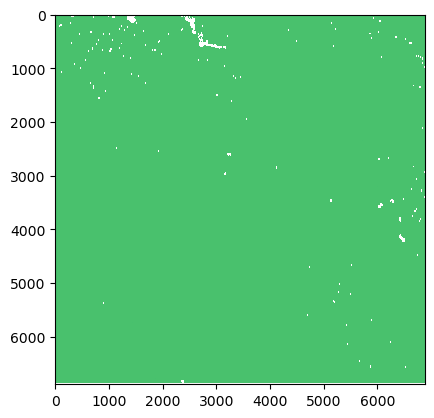

In [72]:
# Calculation based on the formula
band_RG = B04 / B03
# Plot to check if any obvious anomaly
plt.imshow(band_RG)
plt.show()

## Soil Adjusted Total Vegetation Index (SATVI)
(p1650 - p680) / (p1650 + p680 + 0.5)
(B11 - B04) / (B11 + B04 + 0.428)

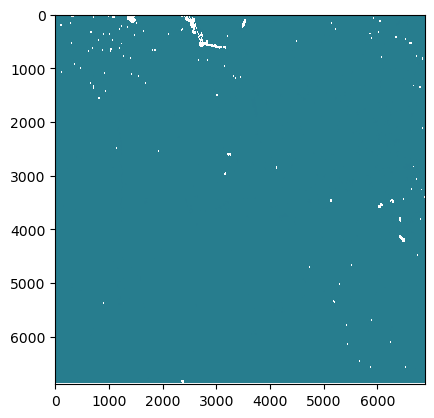

In [73]:
# Calculation based on the formula
band_SATVI = (B11 - B04) / (B11 + B04 + 0.428)
# Plot to check if any obvious anomaly
plt.imshow(band_SATVI)
plt.show()

## Simple Ratio 1060
p1060 / p1640  
B8A / B11

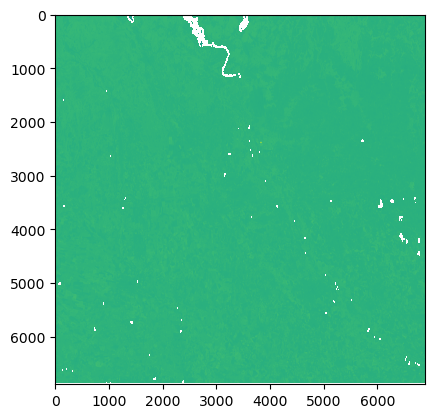

In [74]:
band_SR1060 = B8A / B11
# Plot to check if any obvious anomaly
plt.imshow(band_SR1060)
plt.show()

## Structure Insensitive Pigment Index (SIPI)
(B08 - B01) / (B08 - B04)

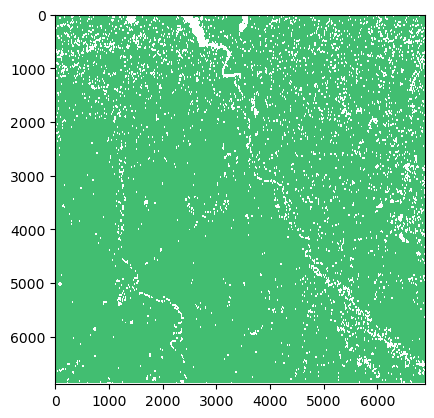

In [75]:
band_SIPI = (B08 - B02) / (B08 - B04)
# Plot to check if any obvious anomaly
plt.imshow(band_SIPI)
plt.show()

## Simple Ratio SRNIR
p864 / p660   
B8A / B04    

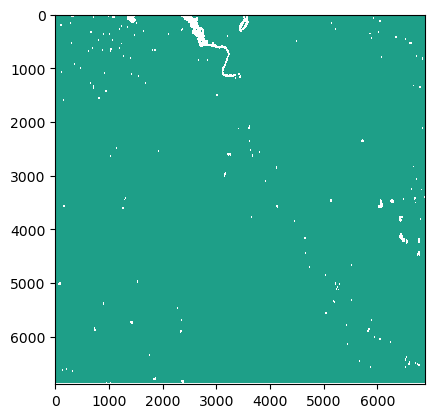

In [76]:
# Calculation based on the formula
band_SRNIR = B8A / B04 
# Plot to check if any obvious anomaly
plt.imshow(band_SRNIR)
plt.show()   

## Transformed Chlorophyll Absorption Ration Index (TCARI)
3 * ((p700 - p670) - 0.2 * (p700 - p550) * (p700 / p670))  
3 * ((B05 - B04) - 0.2 * (B05 - B03) * (B05 / B04))

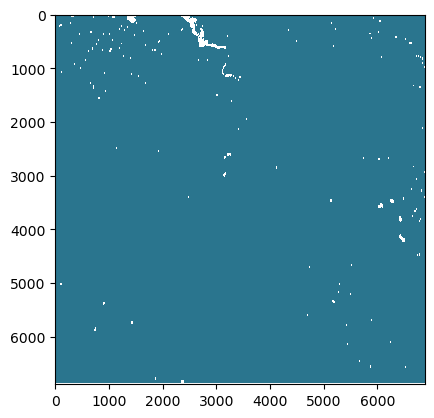

In [77]:
# Calculation based on the formula
band_TCARI = 3 * 3 * ((B05 - B04) - 0.2 * (B05 - B03) * (B05 / B04))
# Plot to check if any obvious anomaly
plt.imshow(band_TCARI)
plt.show()

## Visible Atmospherically Resistance Index (VARI)
(p559 - p640) / (p559 + p640 - p467)    
(B03 - B04) / (B03 + B04 - B02)    

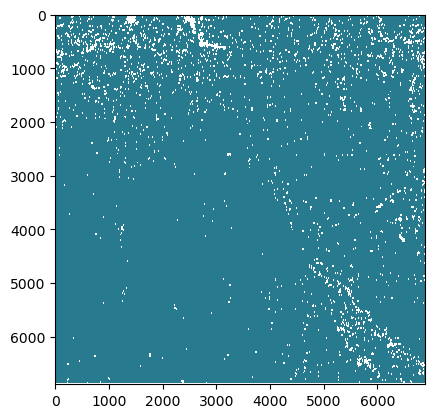

In [78]:
band_VARI = (B03 - B04) / (B03 + B04 - B02)  
# Plot to check if any obvious anomaly
plt.imshow(band_VARI)
plt.show()

## Visible Green Index (Vigreen)
(p559 - p660) / (p559 + p660)    
(B03 - B04) / (B03 + B04)    

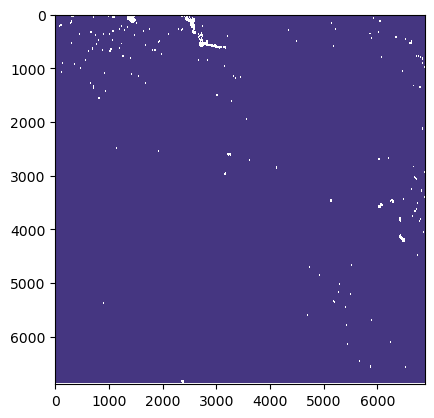

In [79]:
# Calculation based on the formula
band_Vigreen = (B03 - B04) / (B03 + B04)    
# Plot to check if any obvious anomaly
plt.imshow(band_Vigreen)
plt.show()

## Vogelmann Red Edge Index (VOG)
p742 / p722   
B06 / B05

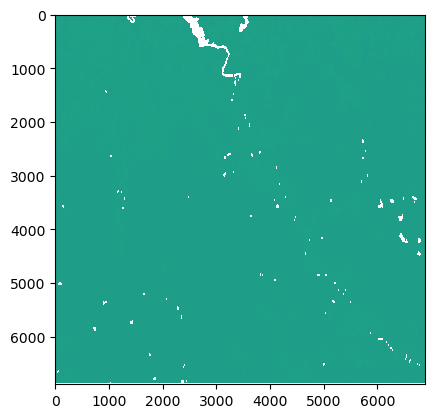

In [80]:
band_VOG = B06 / B05
# Plot to check if any obvious anomaly
plt.imshow(band_VOG)
plt.show()

# Stack selected indices

In [81]:
band_Indices_Sel = [band_ARI, band_ARVI, band_EVI, band_MCARI, band_MSI, band_NDII, band_NDVI, band_NDWI, band_OSAVI, band_RENDVI, band_REP, band_RG, band_SATVI, band_SR1060, band_SIPI, band_SRNIR, band_TCARI, band_VARI, band_Vigreen, band_VOG]
band_Indices_Name_Sel = ['Anthocyanin Reflectance Index (ARI)', 'Atmospheric Resistant Vegetation Index (ARVI)', 'Enhanced Vegetation Index (EVI)', 'Modified Chlorophyll Absorption Ratio Index (MCARI)', 'Moisture Stress Index (MSI)', 'Normalized Difference Infrared Index (NDII)', 'Normalized Difference Vegetation Index (NDVI)', 'Normalized Difference Water Index (NDWI)', 'Optimized Soil-Adjusted Vegetation Index (OSAVI)', 'Red Edge Normalized Difference Vegetation Index (RENDVI)', 'Red Edge Position (REP)', 'Red Green Ratio (RG)', 'Soil Adjusted Total Vegetation Index (SATVI)', 'Simple Ratio 1060', 'Structure Insensitive Pigment Index (SIPI)', 'Simple Ratio SRNIR', 'Transformed Chlorophyll Absorption Ration Index (TCARI)', 'Visible Atmospherically Resistance Index (VARI)', 'Visible Green Index (Vigreen)', 'Vogelmann Red Edge Index (VOG)']
len(band_Indices_Name_Sel)

20

In [82]:
band_Indices_NoMask_Sel = []
for band in band_Indices_Sel:
    a = band.data
    b = band.mask
    a[np.where(b)] = np.nan
    band_Indices_NoMask_Sel.append(a)
band_Indices_NoMask_Sel[0]

array([[       nan, 0.00108786, 0.0010071 , ..., 0.00105618, 0.00154321,
        0.00188648],
       [       nan, 0.00086604, 0.00101399, ..., 0.00091331, 0.00121394,
        0.00150615],
       [       nan, 0.0012801 , 0.00114865, ..., 0.00159165, 0.00112542,
        0.00097373],
       ...,
       [       nan, 0.0003883 , 0.00051876, ..., 0.00079063, 0.00079573,
        0.00078712],
       [       nan, 0.00080179, 0.00088276, ..., 0.00078556, 0.00073029,
        0.00071023],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [83]:
# meta data correction
out_meta = raster_Sel.meta.copy()
out_meta.update({"count": len(band_Indices_Name_Sel),
                })

In [84]:
with rio.open(cwd_Sentinel + "\\" + raster_Names_Sel + "\\" + raster_Names_Sel + "Cropped_StackedIndices_20VI", 'w', **out_meta) as dest:
    for band_nr, src in enumerate(band_Indices_NoMask_Sel, start=1):
        dest.write(src, band_nr)
    dest.descriptions = tuple(band_Indices_Name_Sel)